# Práctica 2. _Clustering_ de regiones vinícolas

En una práctica anterior ya utilizamos los datos de las características de unos vinos pertenecientes a tres bodegas italianas (fichero de datos ``wines`` o ``wine.csv`` que se puede encontrar en el libro de la asignatura. 

En esta práctica vamos a aplicar un aprendizaje no supervisado como el que propone los mapas auto-organizativo de Kohonen para obtener un agrupamiento de los datos.

## Cargar el paquete específico

A continuación cargamos el paquete específico que vamos a usar en esta sección para trabajar con mapas auto-organizativos de Kohonen realizado en Python:


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [1]:
#!git clone https://github.com/cgg-upm/upm-dma-som
#!dir upm-dma-som\som
#!copy upm-dma-som\som\som.py .\*.*
#!copy upm-dma-som\som\utils.py .\*.*

In [2]:
from som import som
from utils import somutils

## Carga de los datos.

Cargamos el archivo  con ``data("wines")`` que ya contiene el nombre de cada columna y no incluye la primera de las columnas que indica la bodega a la que pertenecen los datos de cada instancia (fila).  

En el caso de los mapas auto-organizativos, donde se va a establecer una relación de proximidad entre los atributos, es conveniente escalar los datos.

Estos datos provienen de

https://archive.ics.uci.edu/ml/datasets/Wine

In [5]:
# Se preparan las columnas a tratar
df_wine = pd.read_csv('data/wine.csv', header=None)
df_wine.columns = ['label', 'alcohol',
    'malic acid', 'ash',
    'ash alkalinity',
    'magnesium', 'tot. phenols',
    'flavanoids', 'non-flav. phenols',
    'proanth',
    'col. int.', 'col. hue',
    'OD ratio'
    ,'proline']
# Se borra la columna de la etiqueta
df_wine = df_wine.drop('label', axis=1)
df_wine.head()

,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavanoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
"Número de filas :",  df_wine.values.shape[0], " Número de columnas :", df_wine.values.shape[1]

('Número de filas :', 178, ' Número de columnas :', 13)

In [7]:
scaler = StandardScaler()
X = df_wine.to_numpy()
X_std = scaler.fit_transform(X)
X_std.shape, X.shape

((178, 13), (178, 13))

In [8]:
df=pd.DataFrame(X_std)
columnas = ['alcohol','malic acid','ash',
    'ash alkalinity',
    'magnesium', 'tot. phenols',
    'flavanoids', 'non-flav. phenols',
    'proanth',
    'col. int.', 'col. hue',
    'OD ratio'
    ,'proline']
df.columns = columnas

df.head()

,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavanoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Definir y entrenar el SOM 

La elección de la red bidimensional, tanto en lo que se refiere al número de neuronas como en tipo de entorno, depende del tipo de datos que se esté analizando. En este caso concreto, estamos tratando con instancias que contienen trece atributos y parece conveniente empezar con una malla de $5 \times 5$ neuronas que denominaremos ``som_wine``

In [9]:
nrows = 5
ncols = 5
som_wine = som(nrows=nrows,ncols=ncols)

In [10]:
som_wine.train_SOM(train_data=X_std,epochs=100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.88it/s]


## Resumen del mapa SOM

Comandos específicos de este paquete permiten obtener un resumen de las caracterísiticas del mapa generado. En concreto, la asignación de cada instancia a una neurona del SOM.

In [12]:
_topoXY = som_wine.get_topologiaXY()
df=pd.DataFrame(_topoXY.T)
df.columns=[ "N" + str(i+1) for i in range(_topoXY.shape[0])]
df.insert(loc = 0, column = '', value = ['x','y'])
pd.set_option('display.max_columns', None)
df.head(len(df))

,,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25
0,x,0,1,3,5,6,0,2,4,6,7,0,1,3,5,6,0,2,4,6,7,0,1,3,5,6
1,y,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,4,4,4,4,4,5,5,5,5,5


In [13]:
df=pd.DataFrame(som_wine.getCodes())
df.columns = columnas
df.head(len(df))

,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavanoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
0,1.350447,-0.508622,0.155615,-1.114795,0.465363,1.546582,1.513027,-0.586487,1.070420,0.881860,0.603374,0.572980,2.065029
1,1.208126,-0.395453,-0.151629,-1.237675,-0.162376,0.884110,1.023253,-0.969361,0.853230,0.309141,0.400940,0.964579,1.233894
2,0.468250,-0.515356,0.116443,-0.531988,-0.110533,0.651055,0.739516,-0.691304,0.243233,-0.267899,0.346660,1.280867,0.738001
3,-0.580634,-0.852942,-0.428927,-0.094141,-0.609150,1.199500,0.782498,-1.046345,0.478761,-0.450701,0.807918,0.473519,-0.576639
4,-1.138307,0.651500,-0.202697,0.123001,-0.495926,0.694492,0.625769,-0.484798,1.402351,-1.008864,-0.028764,0.773244,-0.859366
5,0.894982,-0.443475,0.995479,-0.133198,0.831372,0.987850,1.011731,-0.217328,0.666913,0.407877,0.750916,0.428660,1.419180
6,1.189767,0.033513,0.175692,-0.973011,1.343603,0.915776,0.928936,-0.821654,0.449971,0.213290,0.092180,1.173453,0.723324
7,0.474898,-0.340753,-0.429099,-0.906014,-0.147580,0.234561,0.520416,-0.580337,-0.136344,-0.357188,0.591283,0.420512,1.039263
8,-0.682182,-0.805117,-1.334863,-0.340983,-0.802788,-0.042609,0.160185,-0.624079,-0.183221,-0.733966,1.005991,0.673235,-0.667095
9,-0.891090,-0.360644,-0.803183,0.440637,-0.733023,-0.046072,0.104944,-0.107702,-0.018684,-1.085061,-0.193915,0.532650,-1.058626


## Dibujo de la matriz de distancias unificadas (U-Matrix)

Contiene la distancia entre los nodos del SOM. En el gráfico a más intensidad hay una menor distancia entre las neuronas adyacentes. Para cada neurona se calcula la distancia entre ella y sus neuronas vecinas más próximas. Cuanto menor sea el resultado, más próxima estará la neurona con sus vecinas.

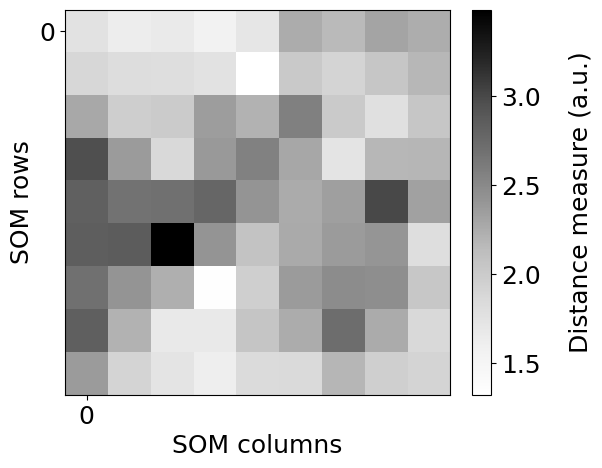

In [14]:
somutils.plot_u_matrix(pSom=som_wine, figsize=(7,5))

## Número de instancias asociadas a cada neurona

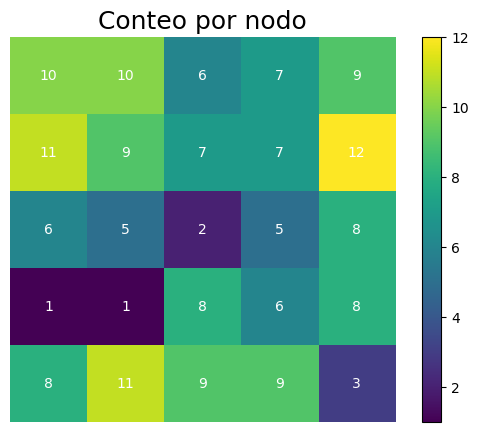

In [15]:
somutils.plot_neurPointsCount(pSom=som_wine, figsize=(7,5))

## Gráfico de códigos

Otro gráfico muy útil para entender el agrupamiento de los datos es el que representa la distribución de los atributos en cada neurona, esto es el vector representativo al que ha convergido cada neurona después del entrenamiento. Haz esta figura y comenta cómo están agrupados los datos en `wine.csv`. 

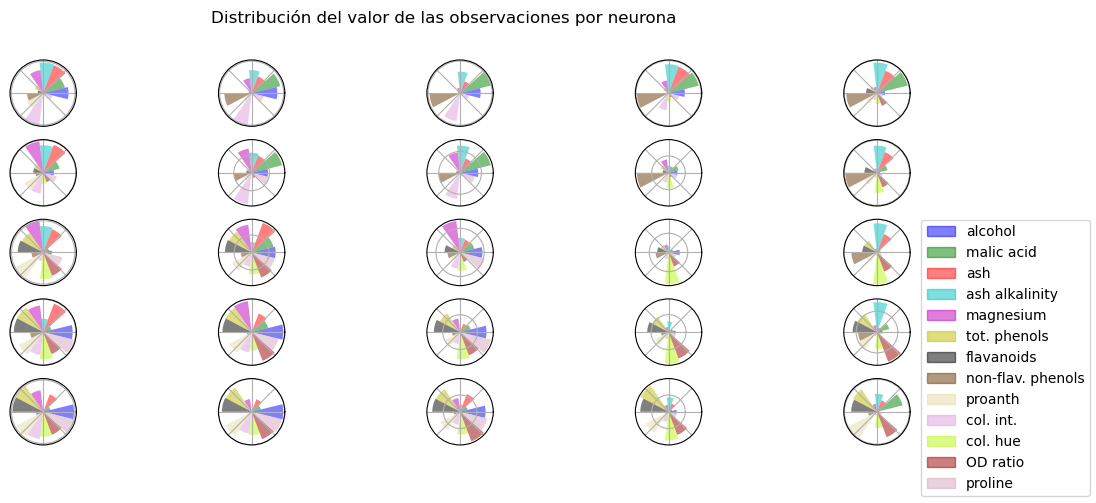

In [16]:
somutils.plot_valuesMap(pSom=som_wine, labels=columnas, figsize=(13,5))

## _Clustering_


Podemos realizar un _clustering_ jerárquico con la función `plot_Cluster_hexagon` usando las distancias entre los vectores prototípicos de las neuronas y añadirlo a la representación.

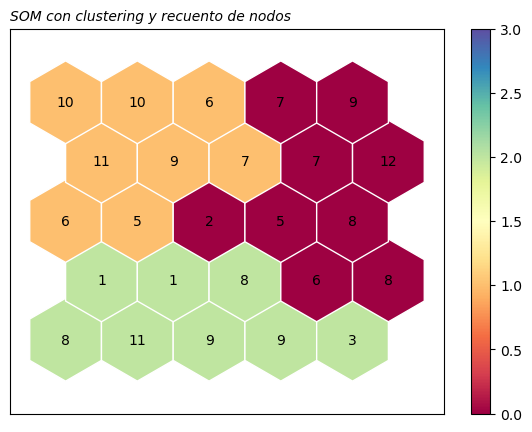

In [17]:
somutils.plot_Cluster_hexagon(pSom=som_wine, n_clusters=3, figsize=(7,5))

In [18]:
som_wine.data_map[0][0]

[16, 47, 48, 64, 79, 97, 102, 103, 106, 108]